## Compare Data Completeness Over Time

**Description**: Analyze the trend of missing data in `"sales_data.csv"` over several months stored in a "date" column. Visualize missing data rates by month.

/tmp/ipykernel_6159/2643175414.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


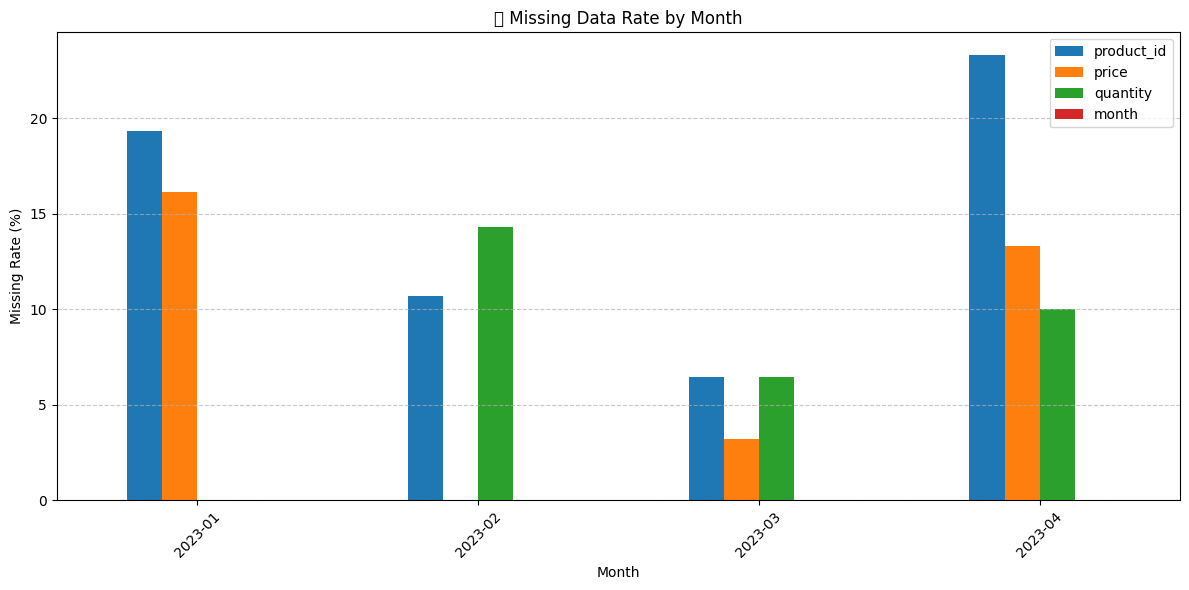

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate sample sales data with missing values over time
date_range = pd.date_range(start='2023-01-01', periods=120, freq='D')

data = {
    'date': date_range,
    'product_id': np.random.choice([101, 102, 103, np.nan], size=120, p=[0.3, 0.3, 0.3, 0.1]),
    'price': np.random.choice([9.99, 19.99, 29.99, np.nan], size=120, p=[0.3, 0.3, 0.3, 0.1]),
    'quantity': np.random.choice([1, 2, 3, np.nan], size=120, p=[0.3, 0.3, 0.3, 0.1])
}

df = pd.DataFrame(data)

# Step 2: Convert "date" to datetime and extract month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')  # e.g., "2023-01"

# Step 3: Calculate missing rate by column for each month
missing_by_month = df.groupby('month').apply(lambda x: x.isnull().mean() * 100)

# Step 4: Drop 'date' and 'month' from missing rate summary
missing_by_month = missing_by_month.drop(columns=['date'])

# Step 5: Visualize missing data rates
missing_by_month.plot(kind='bar', figsize=(12, 6), title="📉 Missing Data Rate by Month")
plt.ylabel("Missing Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()